### Step 1:-  Importing Libraries

In [1]:
import keras 
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from keras.metrics import *
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalMaxPooling2D
from keras.models import Model
from keras import backend as K
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

e:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Step 2:-  Loading the Dataset

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\deepi\\Downloads\\Potato Leaf Classification\\Tomato New Dataset",
    shuffle = True,
    
)
 

Found 18160 files belonging to 2 classes.


In [3]:
class_names = dataset.class_names
class_names

['Train', 'Val']

In [4]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Tomato New Dataset/Train'
valid_path = 'Tomato New Dataset/Val'

### Step 3:- Visualizing the Data

In [6]:
import random
import os
from matplotlib.image import imread

Example: - Tomato Bacterial Spot Dataset

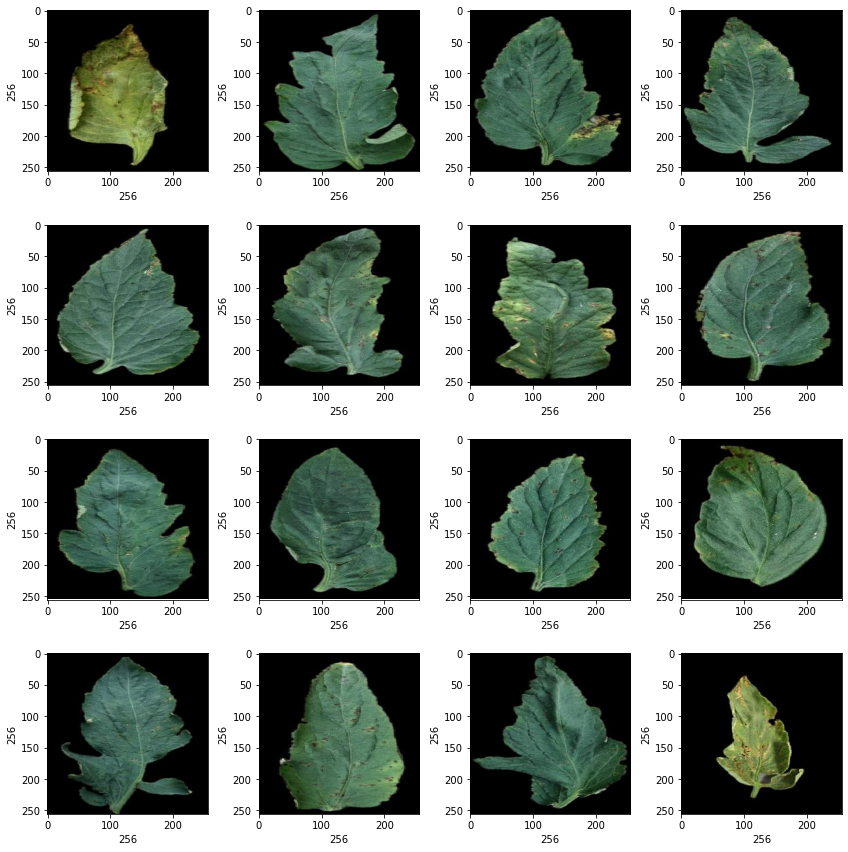

In [7]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "Tomato New Dataset/Train/Tomato___Bacterial_spot"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### Step 4:-  Resizing and Normalizing the Dataset

In [8]:
# Import the Inception V3 Net library as shown below and add preprocessing layer to the front of Inception V3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('Tomato New Dataset/Train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Tomato New Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14529 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Tomato New Dataset/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3631 images belonging to 10 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
455/455 [==============================] - 867s 2s/step - loss: 2.5959 - accuracy: 0.7150 - val_loss: 1.7396 - val_accuracy: 0.7945
Epoch 2/10
455/455 [==============================] - 970s 2s/step - loss: 1.8255 - accuracy: 0.8133 - val_loss: 2.1200 - val_accuracy: 0.8045
Epoch 3/10
455/455 [==============================] - 733s 2s/step - loss: 1.7470 - accuracy: 0.8363 - val_loss: 1.5858 - val_accuracy: 0.8551
Epoch 4/10
455/455 [==============================] - 986s 2s/step - loss: 1.5006 - accuracy: 0.8570 - val_loss: 2.7549 - val_accuracy: 0.8050
Epoch 5/10
455/455 [==============================] - 683s 2s/step - loss: 1.7270 - accuracy: 0.8582 - val_loss: 2.5672 - val_accuracy: 0.8177
Epoch 6/10
455/455 [==============================] - 850s 2s/step - loss: 1.5425 - accuracy: 0.8759 - val_loss: 2.0588 - val_accuracy: 0.8659
Epoch 7/10
455/455 [==============================] - 768s 2s/step - loss: 1.2578 - accuracy: 0.8937 - val_loss: 1.7890 - val_accuracy: 0.8662

In [19]:
model.save('InceptionV3.h5')

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('InceptionV3.h5')

In [22]:
scores = model.evaluate(test_set)

114/114 [==============================] - 179s 2s/step - loss: 1.8856 - accuracy: 0.8854


In [23]:
scores

[1.885596513748169, 0.8854309916496277]

In [24]:
r.params

{'verbose': 1, 'epochs': 10, 'steps': 455}

In [25]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
type(r.history['loss'])

list

In [27]:
len(r.history['loss'])

10

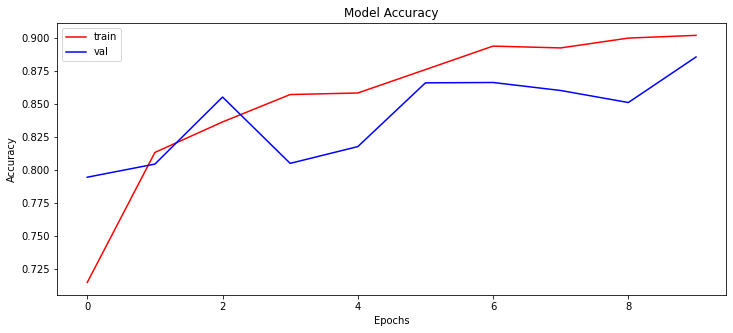

In [28]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(r.history['accuracy'], color='r')
plt.plot(r.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

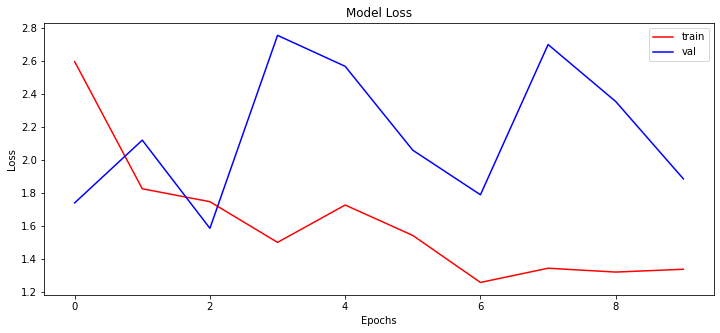

In [29]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(r.history['loss'], color='r')
plt.plot(r.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [30]:
y_pred = model.predict(test_set)
y_pred

114/114 [==============================] - 215s 2s/step


array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.03395885e-35, 2.32860221e-30, 0.00000000e+00, ...,
        2.95594746e-17, 1.06509980e-07, 1.79129770e-35],
       [1.00000000e+00, 2.63958780e-38, 0.00000000e+00, ...,
        0.00000000e+00, 1.67475471e-38, 0.00000000e+00],
       [6.51311755e-21, 1.30371032e-20, 1.00000000e+00, ...,
        2.83726702e-33, 0.00000000e+00, 1.49560366e-24]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 7, 7, ..., 5, 0, 2], dtype=int64)

In [32]:
img=image.load_img('Tomato New Dataset/Val/Tomato__Septoria_leaf_spot/cde3269d-4c8f-4ea8-9b3c-e5b1d4529022___Matt.S_CG 2522_final_masked.jpg',target_size=(224,224))

In [33]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [36]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

1/1 [==============================] - 4s 4s/step


array([[1.1471622e-11, 9.5225960e-01, 4.7738608e-02, 5.3224179e-13,
        1.8394973e-06, 4.3311701e-11, 1.9750399e-10, 5.9984590e-14,
        1.4788649e-09, 2.3137070e-21]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 205ms/step


In [ ]:
print('Disease : ',l[int(y_pred)].upper())

In [39]:
a==1

array([ True])